# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



First of all, I inserted the data from the CSV file into SQL SERVER using the codes below:

THIS IS THE CODE THAT I USED TO CREATE THE TABLE IN SQL SERVER, I COULDN'T ESTABLISH AN INTEGRATION SO I'LL JUST COMMENT IT, AND USE PYTHON FOR THE MOST PART OF THE PROJECT.

In [53]:


/*
CREATE TABLE datacamp (
    product_id INT PRIMARY KEY,
    category VARCHAR(20),
    animal VARCHAR(20),
    size VARCHAR(10),
    price DECIMAL(10,2),
    sales DECIMAL(10,2),
    rating INT,
    repeat_purchase INT
)
*/

""


THIS IS THE PYTHON CODE THAT I USED TO INSERT THE CSV DATA INTO THE SQL SERVER DATABASE

In [54]:
'''


import pyodbc
import pandas as pd


file = pd.read_csv('pet_supplies_2212.csv')


server = '<myserver>' 
database = 'Datacamp' 
username = 'sa' 
password = '<my_pass>' 
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

for index, row in file.iterrows():
    
    
          
        
    

    cursor.execute("INSERT INTO datacamp (product_id,category,animal,size,price,sales,rating,repeat_purchase) VALUES (?,?,?,lower(?),?,?,?,?)",
                   row.product_id, row.category, row.animal, row['size'], row.price, row.sales, row.rating, row.repeat_purchase)

cnxn.commit()
cursor.close()
'''


'\n\n\nimport pyodbc\nimport pandas as pd\n\n\nfile = pd.read_csv(\'pet_supplies_2212.csv\')\n\n\nserver = \'<myserver>\' \ndatabase = \'Datacamp\' \nusername = \'sa\' \npassword = \'<my_pass>\' \ncnxn = pyodbc.connect(\'DRIVER={SQL Server};SERVER=\'+server+\';DATABASE=\'+database+\';UID=\'+username+\';PWD=\'+ password)\ncursor = cnxn.cursor()\n\nfor index, row in file.iterrows():\n    \n    \n    try:\n        row.price = float(row.price)\n    except:\n        row.price = None\n        row.rating = None\n        \n        \n    \n\n    cursor.execute("INSERT INTO datacamp (product_id,category,animal,size,price,sales,rating,repeat_purchase) VALUES (?,?,?,lower(?),?,?,?,?)",\n                   row.product_id, row.category, row.animal, row[\'size\'], row.price, row.sales, row.rating, row.repeat_purchase)\n\ncnxn.commit()\ncursor.close()\n'

I've got unexpected results from the imports of the 'SIZE' column, when I tried to validate the data imported, the values were all '8', then I switched 'row.size' to 'row['size']' and it worked. Once the data was in the database I started to look for missing values.

Using SQL SERVER, I was able to notice that the missing values of the category column were filled with '-', the missing values of the price column were equal to 'unlisted', and the rating column had null values (These columns gave me a hard time when I was inserting the data into SQL SERVER). On the code below I used SQL to get the median of the prices column, I couldn't establish an integration with the workspace, So i'll just comment some of the SQL codes that I used.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('pet_supplies_2212.csv')
print(f"The number of missing values in the Category columns is {len(data[data['category'] == '-'])}")
print(f"The number of missing values in the Price column is {len(data[data['price'] == 'unlisted'])}")
print(f"The number of missing values in the Ratings column is {len(data[data['rating'].isnull()])}")
print('The remaining columns got no missing values')

#UPDATE DATACAMP SET category = 'Unknown' where category is null
data['category'] = data['category'].replace('-','Unknown')

#SELECT PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY price) OVER () FROM DATACAMP -> (28.065)
#UPDATE DATACAMP SET price = 28.065 where price is null
data['price'] = data['price'].replace('unlisted', 28.065)

#UPDATE DATACAMP SET rating = 0 where rating is null
data['rating'] = data['rating'].fillna(value = 0)

The number of missing values in the Category columns is 25
The number of missing values in the Price column is 150
The number of missing values in the Ratings column is 150
The remaining columns got no missing values


**The values do match the description that was given in the table, as we can see:**

**product_id**: It's nominal because it's a unique identifier for each product and has no inherent order or ranking.

**category**: It's nominal because it represents the category of the product and has no order or ranking.

**animal**: It's nominal because it represents the species for which the food is intended and has no inherent order or ranking.

**size**: It's ordinal because it represents a size category that can be ranked based on a logical order, e.g., small, medium, and large.

**price and sales**: It's a continuous variable because it represents a numeric value that can take any value within a certain range.

**rating**: It's a discrete variable because it represents a rating on a scale from 1 to 10, which are discrete numerical values.

**repeat_purchase**: It's a nominal variable because it represents a binary category and has no inherent order or ranking.

## Task 2

Running the query "_SELECT COUNT(*), repeat_purchase from datacamp group by repeat_purchase_" I've got the result that the **repeated purchases(1)** occur a lot more than the **non repeated purchases(0)**, the values were **594 non repeated purchases** and **906 repeated purchases**, **so the observations are not balanced across categories of the
variable repeat purchases.**

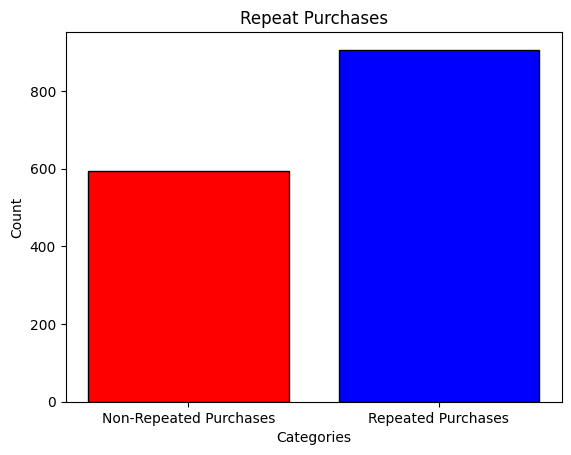

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('pet_supplies_2212.csv')
data['category'] = data['category'].replace('-','Unknown')
data['price'] = data['price'].replace('unlisted', 28.065)
data['rating'] = data['rating'].fillna(value = 0)

#SELECT COUNT(*), REPEAT_PURCHASE FROM DATACAMP GROUP BY REPEAT_PURCHASE;
repeat_purchase_counts = data['repeat_purchase'].value_counts()

fig, ax = plt.subplots()
ax.bar(['Non-Repeated Purchases', 'Repeated Purchases'], repeat_purchase_counts.values[::-1], color=['red', 'blue'], edgecolor='black', tick_label=['Non-Repeated Purchases', 'Repeated Purchases'])


ax.set_title('Repeat Purchases')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')

plt.show()


## Task 3

As we can see in the histogram below, it's a normal distribution, because the median sits right in the middle of the chart, the values calculated for median, mode and mean were very close to each other (mean =996.60,median=1000.83, mode=1034.36).

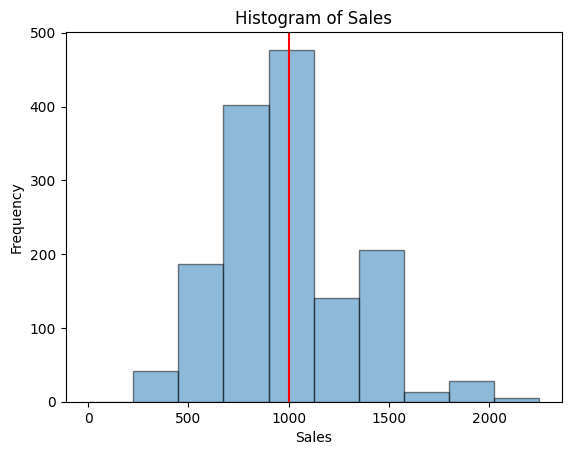

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('pet_supplies_2212.csv')
data = pd.read_csv('pet_supplies_2212.csv')
data['category'] = data['category'].replace('-','Unknown')
data['price'] = data['price'].replace('unlisted', 28.065)
data['rating'] = data['rating'].fillna(value = 0)
 

plt.hist(data['sales'], alpha=0.5, edgecolor='black',range=(0,2250))


plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
#line that indicates the median
plt.axvline(x=1000.83, color='r')
plt.show()

## Task 4

Through the charts is possible to visualize that Repeated Purchases occur more than Non Repeated Purchases(People tend to buy things more than once). The Sum of Sales of Repeated Purchases = 884046.17, The Sum of Sales of Non Repeated Purchases = 610850.6 The Count of Sales of Repeated Purchases = 906, The Count of Sales of Non Repeated Purchases = 594.

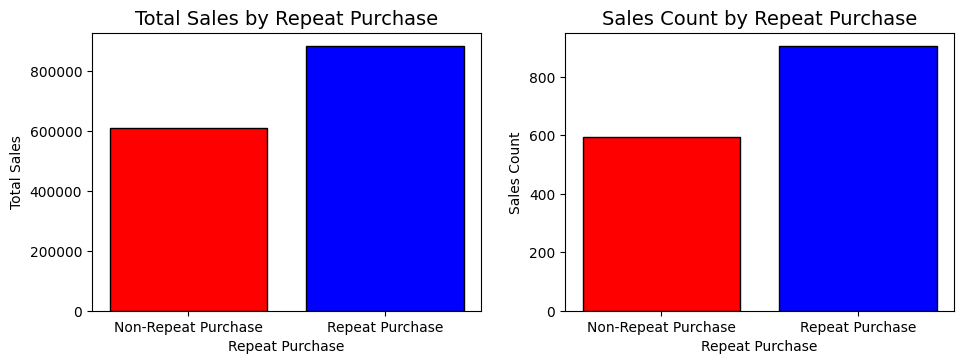

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('pet_supplies_2212.csv')
data['category'] = data['category'].replace('-','Unknown')
data['price'] = data['price'].replace('unlisted', 28.065)
data['rating'] = data['rating'].fillna(value = 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

#SELECT SUM(SALES) FROM DATACAMP WHERE repeat_purchase = 1;
#SELECT SUM(SALES) FROM DATACAMP WHERE repeat_purchase = 0;
total_sales = data.groupby('repeat_purchase')['sales'].sum()
ax1.bar(['Non-Repeat Purchase', 'Repeat Purchase'], total_sales, color=['red', 'blue'], edgecolor='black', label='Sales')
ax1.set_xlabel('Repeat Purchase')
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Sales by Repeat Purchase', fontsize=14)

#SELECT COUNT(SALES) FROM DATACAMP WHERE repeat_purchase = 1;
#SELECT COUNT(SALES) FROM DATACAMP WHERE repeat_purchase = 0;
sales_count = data.groupby('repeat_purchase')['sales'].count()
ax2.bar(['Non-Repeat Purchase', 'Repeat Purchase'], sales_count, color=['red', 'blue'], edgecolor='black', label='Sales Count')
ax2.set_xlabel('Repeat Purchase')
ax2.set_ylabel('Sales Count')
ax2.set_title('Sales Count by Repeat Purchase', fontsize=14)

fig.tight_layout(pad=2)

plt.show()

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam